In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [4]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [7]:
df['average-wind-speed-(period)'] = df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean())

# Task
Perform a full EDA on the dataframe.

## Understand the data

### Subtask:
Display the first few rows of the dataframe and check the data types and summary statistics.


**Reasoning**:
The first instruction of the subtask is to display the first few rows of the dataframe, the `.head()` method is suitable for this purpose.



In [8]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


**Reasoning**:
The next instruction is to print the column names and their data types, and then display descriptive statistics. Both can be done with `.info()` and `.describe()` methods respectively.



In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2919 non-null   float64
 1   temperature                  2919 non-null   int64  
 2   wind-direction               2919 non-null   int64  
 3   wind-speed                   2919 non-null   float64
 4   sky-cover                    2919 non-null   int64  
 5   visibility                   2919 non-null   float64
 6   humidity                     2919 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2919 non-null   float64
 9   power-generated              2919 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 250.9 KB


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.503327,58.468996,24.957862,10.099486,1.987667,9.559609,73.505995,10.129154,30.017712,6982.182939
std,0.298069,6.842318,6.912203,4.837128,1.412220,1.380290,15.073974,7.261547,0.142006,10313.330078
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.232061,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.479241,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739559,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12725.000000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


## Handle missing values

### Subtask:
Check for missing values and decide on a strategy to handle them (e.g., imputation or removal).


**Reasoning**:
Check for missing values in the dataframe.



In [10]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),0
average-pressure-(period),0
power-generated,0


## Visualize distributions

### Subtask:
Create visualizations to understand the distribution of each feature (e.g., histograms, box plots).


**Reasoning**:
Create histograms and box plots for each column to visualize their distributions and identify potential outliers.



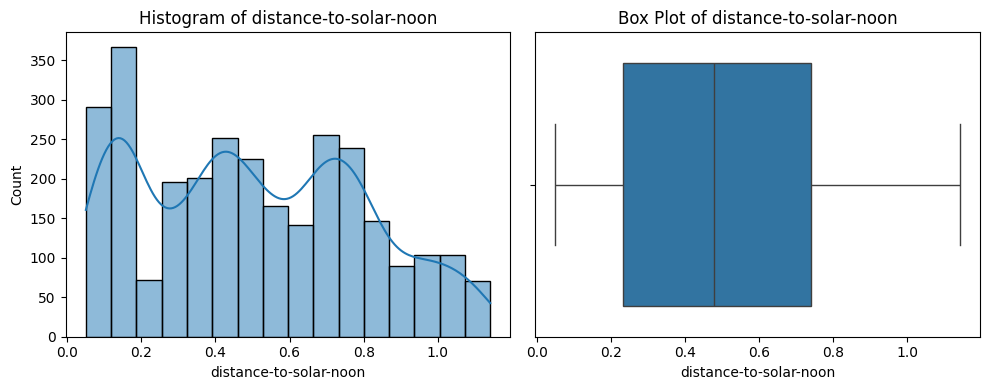

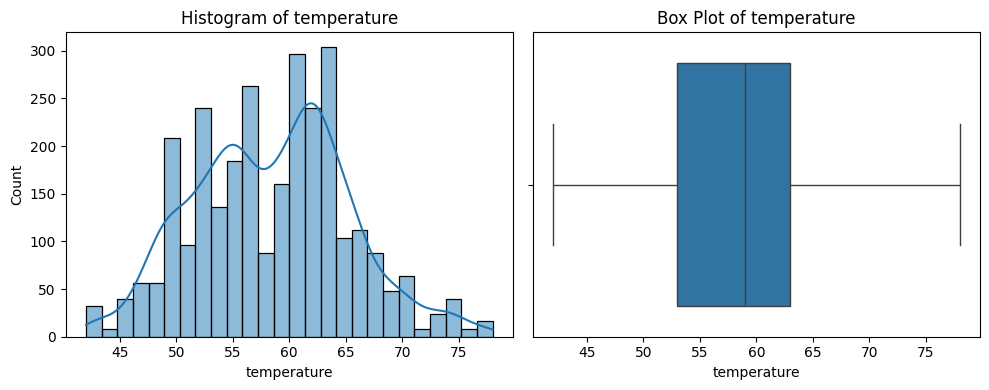

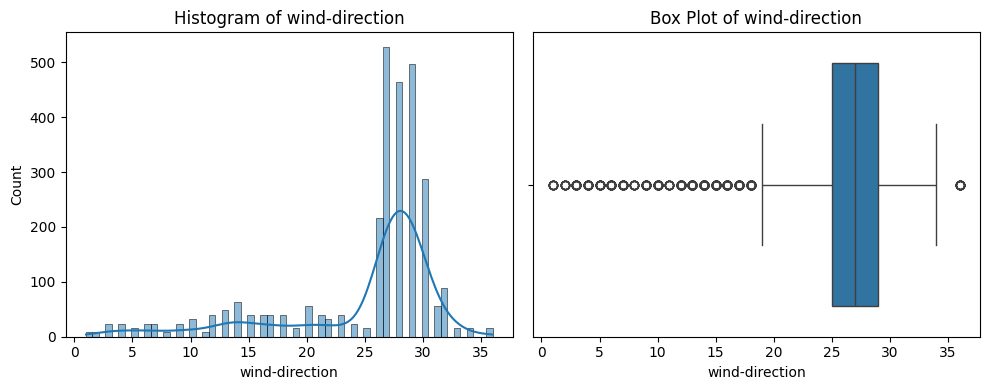

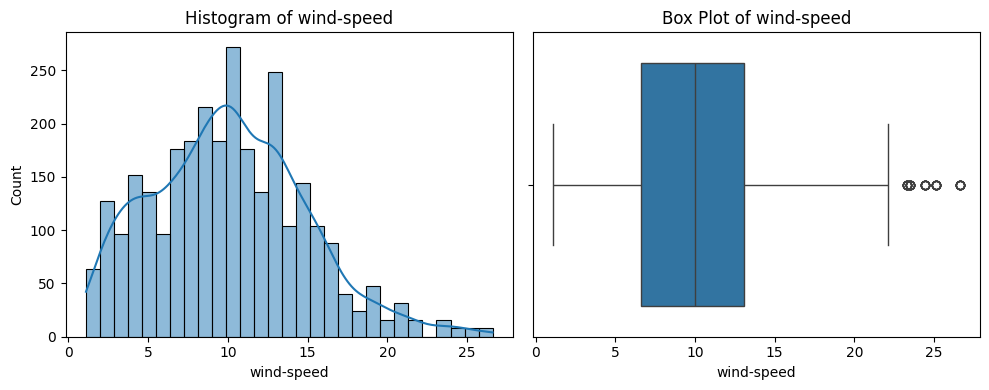

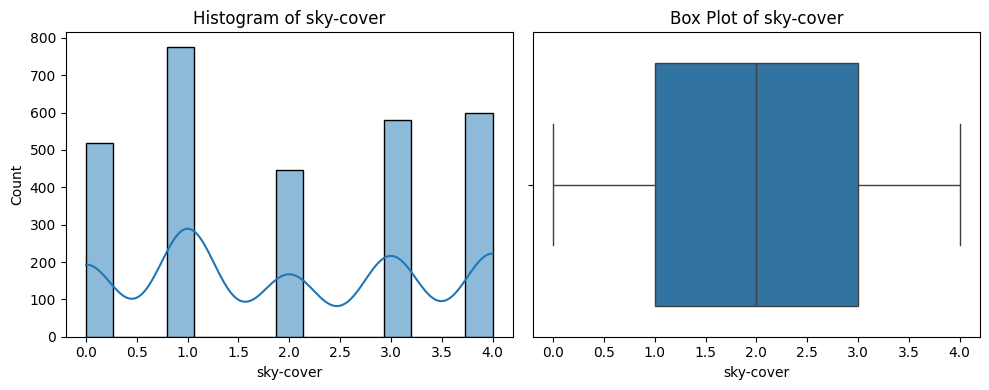

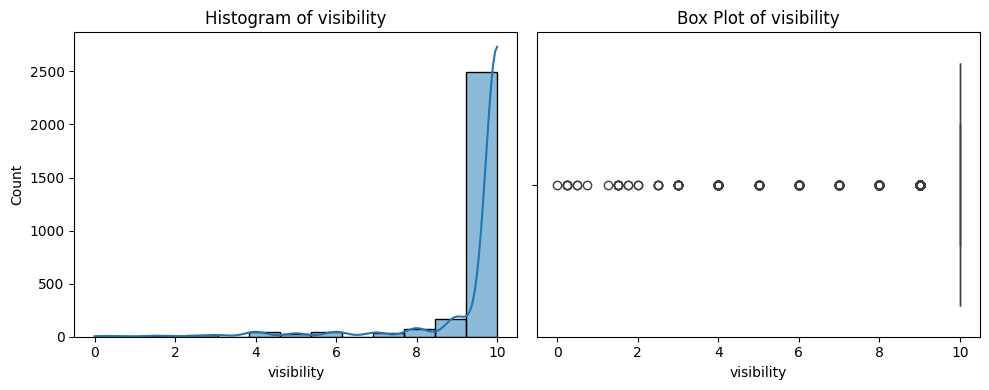

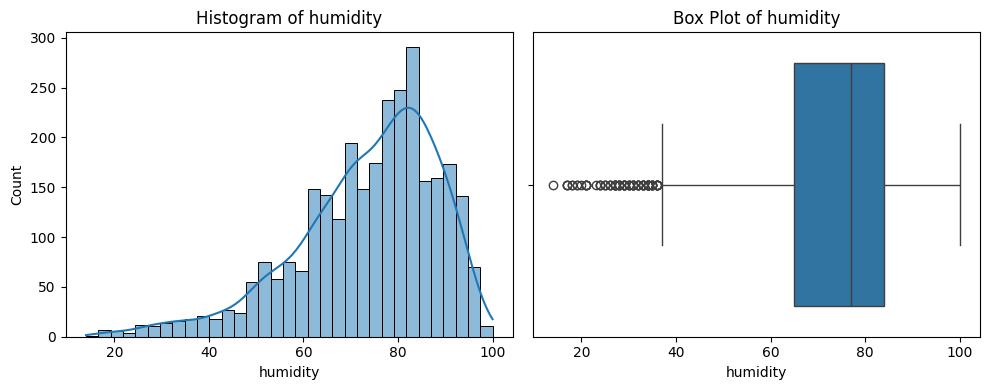

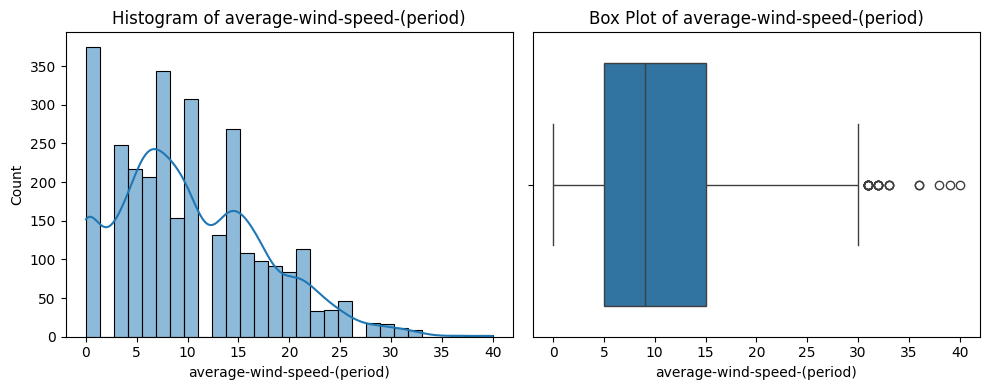

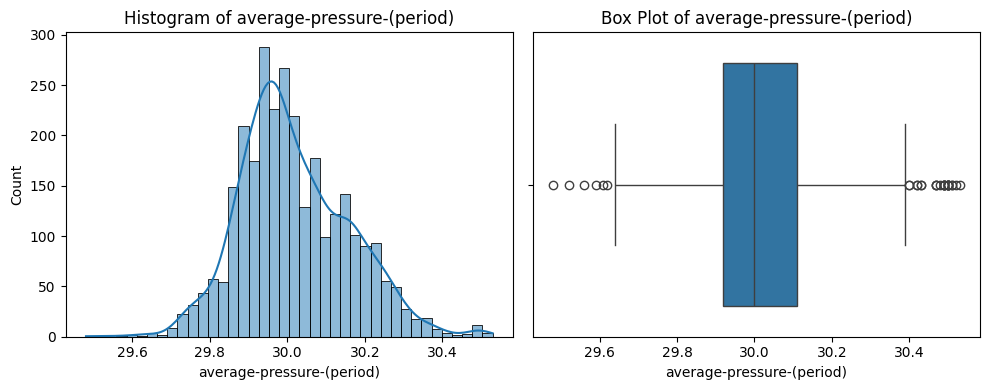

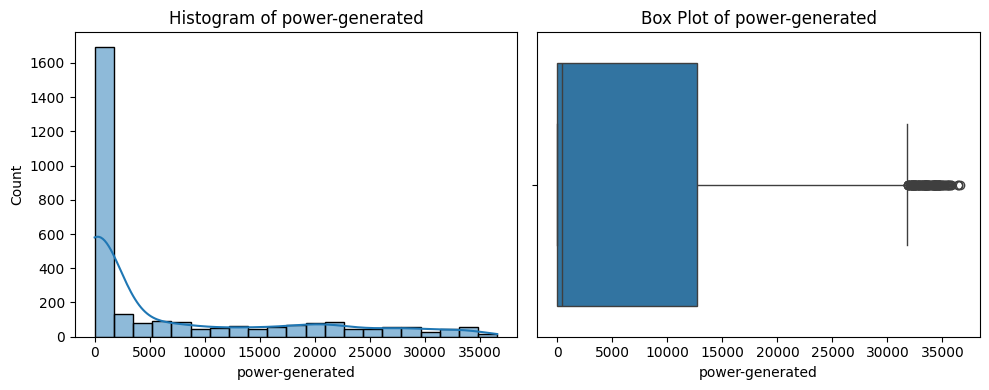

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

## Analyze relationships

### Subtask:
Explore the relationships between features and the target variable (`power-generated`) using scatter plots, correlation matrix, etc.


**Reasoning**:
Calculate and display the correlation matrix and then create scatter plots for each feature against the target variable 'power-generated'.



,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145235,-0.118293,-0.145301,-0.015183,0.065541,0.369278,-0.214891,0.082633,-0.746825
temperature,-0.145235,1.000000,0.342216,0.096194,-0.230673,0.194354,-0.221440,0.054546,-0.435728,0.132155
wind-direction,-0.118293,0.342216,1.000000,0.340899,-0.137217,0.201546,-0.095053,0.229844,-0.271973,0.146463
wind-speed,-0.145301,0.096194,0.340899,1.000000,0.107840,0.183281,0.005676,0.673626,-0.379447,0.142366
sky-cover,-0.015183,-0.230673,-0.137217,0.107840,1.000000,-0.224131,0.394722,0.044301,-0.091531,-0.187248
visibility,0.065541,0.194354,0.201546,0.183281,-0.224131,1.000000,-0.290180,0.143621,-0.104273,0.075841
humidity,0.369278,-0.221440,-0.095053,0.005676,0.394722,-0.290180,1.000000,-0.218042,0.017987,-0.522445
average-wind-speed-(period),-0.214891,0.054546,0.229844,0.673626,0.044301,0.143621,-0.218042,1.000000,-0.293457,0.278174
average-pressure-(period),0.082633,-0.435728,-0.271973,-0.379447,-0.091531,-0.104273,0.017987,-0.293457,1.000000,-0.036553
power-generated,-0.746825,0.132155,0.146463,0.142366,-0.187248,0.075841,-0.522445,0.278174,-0.036553,1.000000


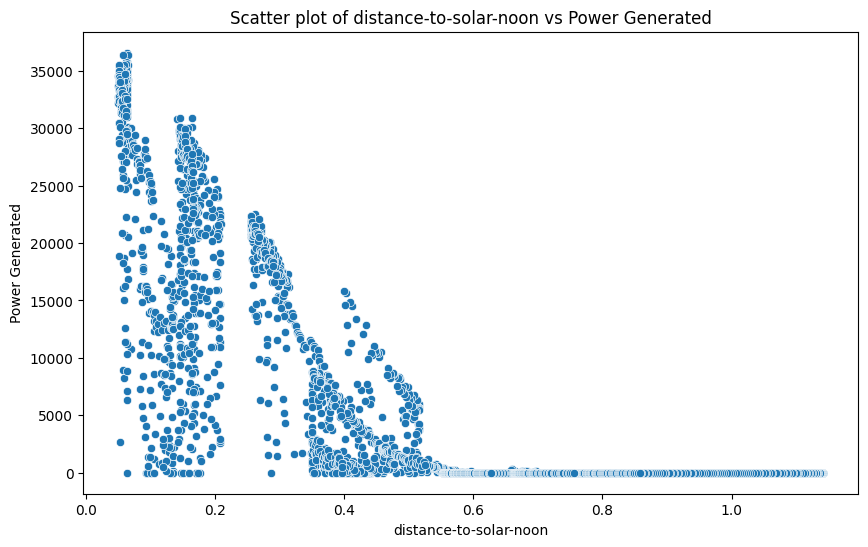

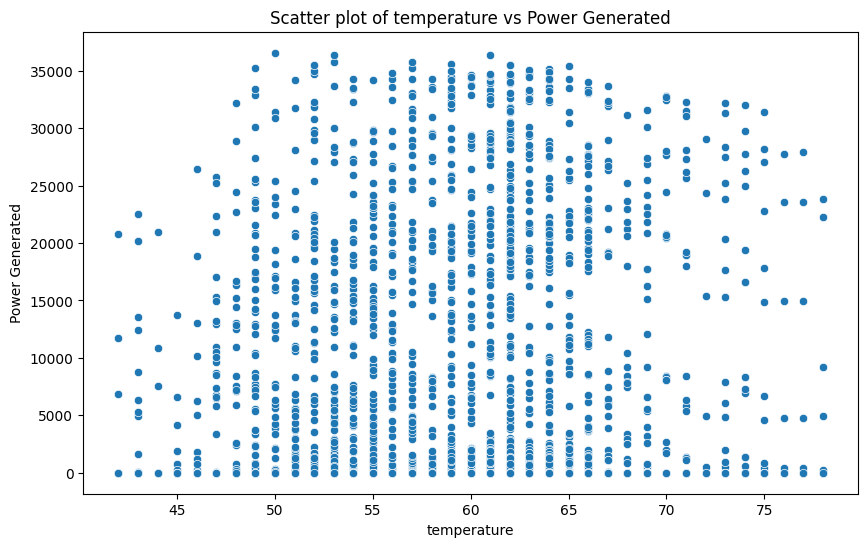

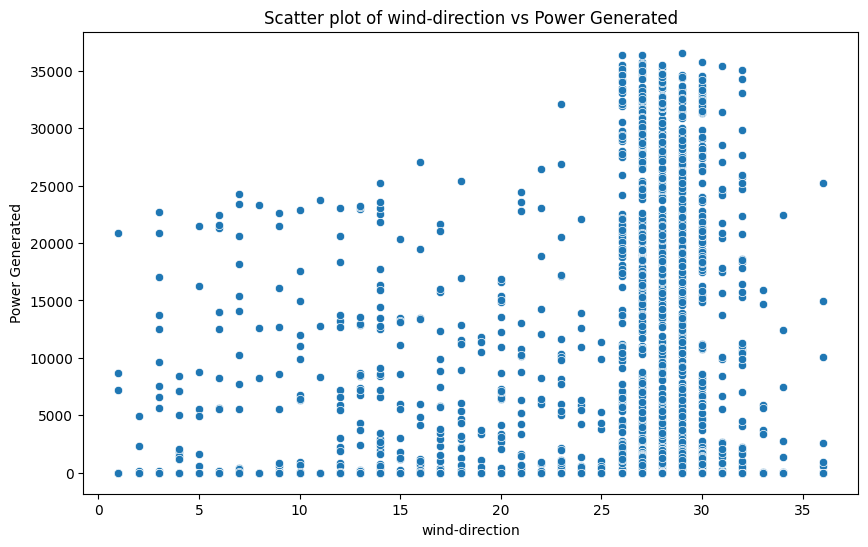

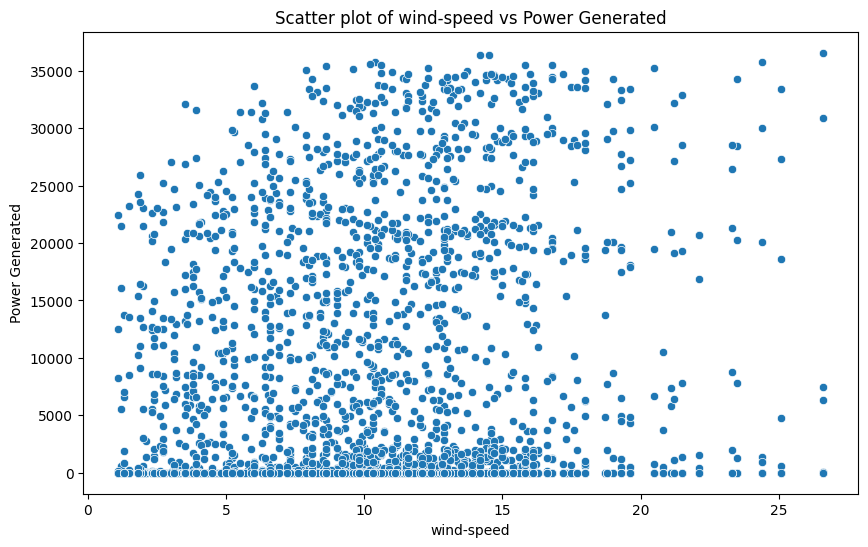

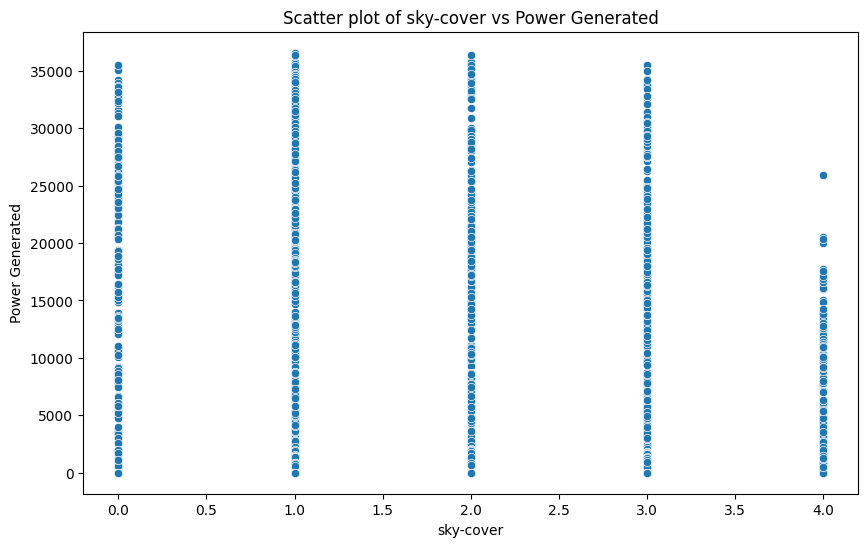

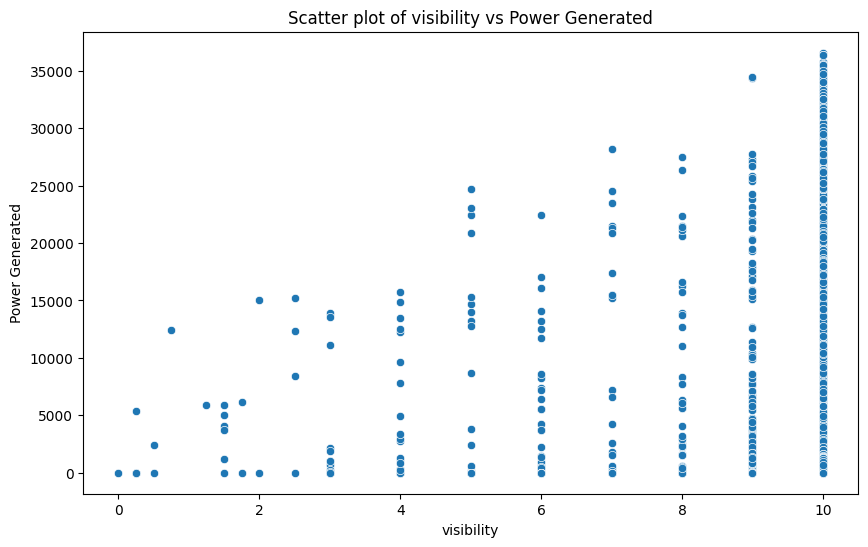

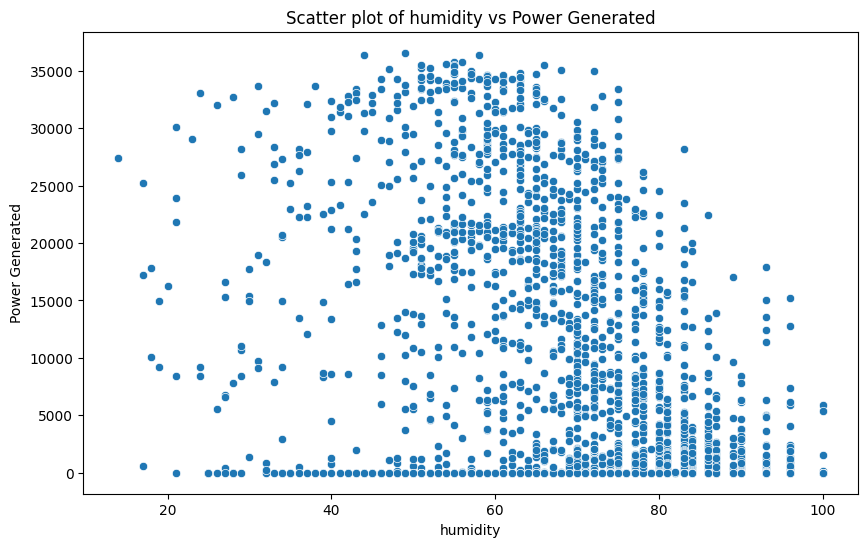

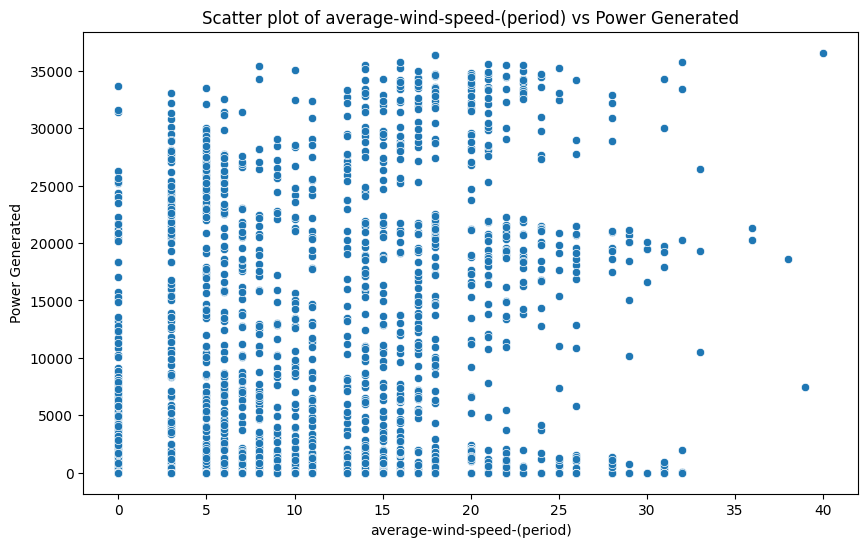

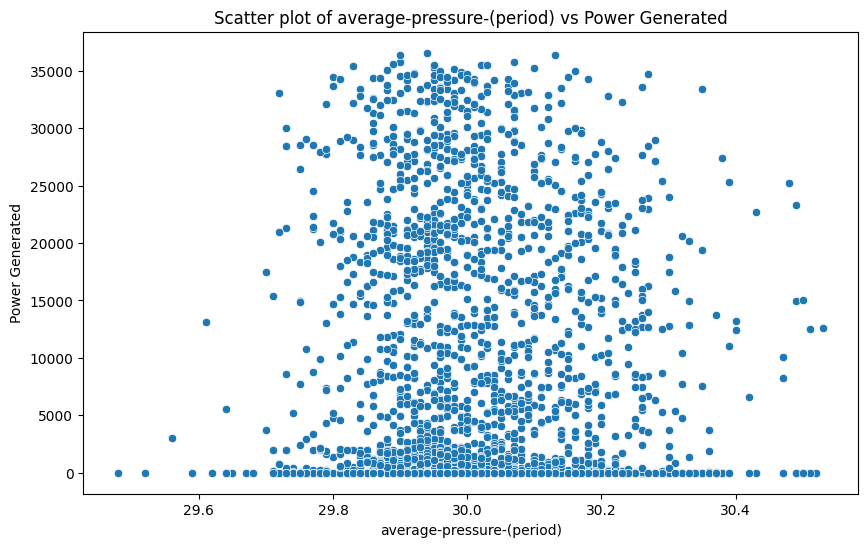

In [12]:
correlation_matrix = df.corr()
display(correlation_matrix)

features = df.columns.drop('power-generated')
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['power-generated'])
    plt.title(f'Scatter plot of {feature} vs Power Generated')
    plt.xlabel(feature)
    plt.ylabel('Power Generated')
    plt.show()

## Identify outliers

### Subtask:
Detect and analyze outliers in the data.


**Reasoning**:
Calculate and print the number of outliers for each numerical column using the IQR method.



In [13]:
for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column '{column}': {len(outliers)} outliers found.")

Column 'distance-to-solar-noon': 0 outliers found.
Column 'temperature': 0 outliers found.
Column 'wind-direction': 527 outliers found.
Column 'wind-speed': 40 outliers found.
Column 'sky-cover': 0 outliers found.
Column 'visibility': 428 outliers found.
Column 'humidity': 83 outliers found.
Column 'average-wind-speed-(period)': 25 outliers found.
Column 'average-pressure-(period)': 31 outliers found.
Column 'power-generated': 107 outliers found.


## Summarize findings

### Subtask:
Summarize the key findings from the EDA.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 2919 entries with no missing values.
*   All columns are of numerical data types (`float64` or `int64`).
*   'distance-to-solar-noon' and 'humidity' show strong negative correlations with 'power-generated' (-0.747 and -0.522, respectively).
*   'average-wind-speed-(period)' has a weak positive correlation (0.278) with 'power-generated'.
*   Outliers were detected in several columns, most notably in 'wind-direction' (527), 'visibility' (428), and 'power-generated' (107).

### Insights or Next Steps

*   Investigate the nature and potential impact of the significant number of outliers in 'wind-direction', 'visibility', and 'power-generated'.
*   Consider feature engineering or transformation based on the observed distributions and the strong negative correlations of 'distance-to-solar-noon' and 'humidity' with 'power-generated'.


In [14]:
for column in df.select_dtypes(include=np.number).columns:
    if column not in ['distance-to-solar-noon', 'temperature']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Shape of the dataframe after removing outliers:", df.shape)

Shape of the dataframe after removing outliers: (2001, 10)


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('power-generated', axis=1)
y = df['power-generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 9)
Shape of X_test: (401, 9)
Shape of y_train: (1600,)
Shape of y_test: (401,)


In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1372.71
Mean Squared Error (MSE): 9945611.74
Root Mean Squared Error (RMSE): 3153.67
R-squared (R2): 0.92


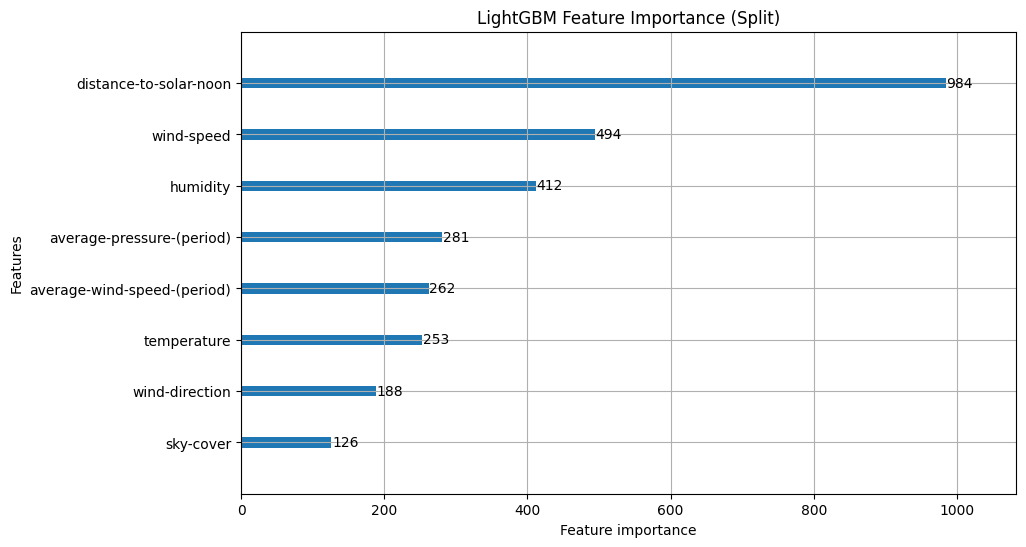

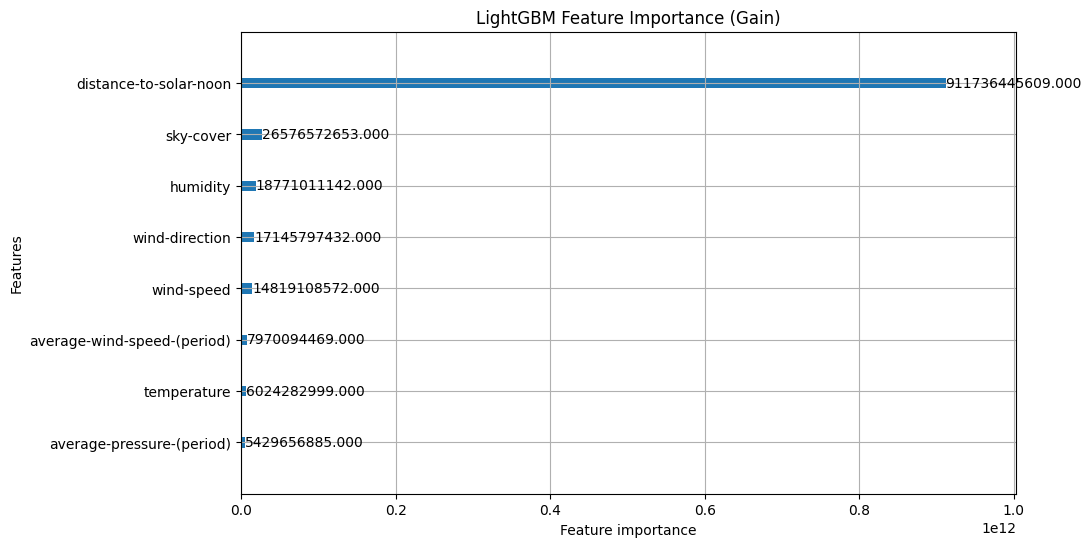

In [19]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgbm, importance_type='split', figsize=(10, 6))
plt.title('LightGBM Feature Importance (Split)')
plt.show()

lgb.plot_importance(lgbm, importance_type='gain', figsize=(10, 6))
plt.title('LightGBM Feature Importance (Gain)')
plt.show()

In [18]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM Mean Absolute Error (MAE): {mae_lgbm:.2f}")
print(f"LightGBM Mean Squared Error (MSE): {mse_lgbm:.2f}")
print(f"LightGBM Root Mean Squared Error (RMSE): {rmse_lgbm:.2f}")
print(f"LightGBM R-squared (R2): {r2_lgbm:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] Start training from score 7836.794375
LightGBM Mean Absolute Error (MAE): 1366.66
LightGBM Mean Squared Error (MSE): 8948542.97
LightGBM Root Mean Squared Error (RMSE): 2991.41
LightGBM R-squared (R2): 0.93


In [21]:
# Re-split the data with the new features
X = df.drop('power-generated', axis=1)
y = df['power-generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 12)
Shape of X_test: (401, 12)
Shape of y_train: (1600,)
Shape of y_test: (401,)


In [22]:
# Retrain the LightGBM model with the new features
lgbm_new_features = lgb.LGBMRegressor(random_state=42)
lgbm_new_features.fit(X_train, y_train)

y_pred_lgbm_new_features = lgbm_new_features.predict(X_test)

mae_lgbm_new_features = mean_absolute_error(y_test, y_pred_lgbm_new_features)
mse_lgbm_new_features = mean_squared_error(y_test, y_pred_lgbm_new_features)
rmse_lgbm_new_features = np.sqrt(mse_lgbm_new_features)
r2_lgbm_new_features = r2_score(y_test, y_pred_lgbm_new_features)

print(f"LightGBM with New Features Mean Absolute Error (MAE): {mae_lgbm_new_features:.2f}")
print(f"LightGBM with New Features Mean Squared Error (MSE): {mse_lgbm_new_features:.2f}")
print(f"LightGBM with New Features Root Mean Squared Error (RMSE): {rmse_lgbm_new_features:.2f}")
print(f"LightGBM with New Features R-squared (R2): {r2_lgbm_new_features:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 11
[LightGBM] [Info] Start training from score 7836.794375
LightGBM with New Features Mean Absolute Error (MAE): 1330.68
LightGBM with New Features Mean Squared Error (MSE): 8635561.51
LightGBM with New Features Root Mean Squared Error (RMSE): 2938.63
LightGBM with New Features R-squared (R2): 0.93


In [24]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [25]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(random_state=42, verbose=0) # verbose=0 to reduce output
catboost.fit(X_train, y_train)

y_pred_catboost = catboost.predict(X_test)

mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost Mean Absolute Error (MAE): {mae_catboost:.2f}")
print(f"CatBoost Mean Squared Error (MSE): {mse_catboost:.2f}")
print(f"CatBoost Root Mean Squared Error (RMSE): {rmse_catboost:.2f}")
print(f"CatBoost R-squared (R2): {r2_catboost:.2f}")

CatBoost Mean Absolute Error (MAE): 1379.53
CatBoost Mean Squared Error (MSE): 8484846.29
CatBoost Root Mean Squared Error (RMSE): 2912.88
CatBoost R-squared (R2): 0.93


In [20]:
# Create interaction features
df['temp_wind_interaction'] = df['temperature'] * df['wind-speed']
df['humidity_sky_interaction'] = df['humidity'] * df['sky-cover']

# Create polynomial features for a few key variables (e.g., distance-to-solar-noon)
df['distance-to-solar-noon_sq'] = df['distance-to-solar-noon']**2

# Display the first few rows with the new features
display(df.head())

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated,temp_wind_interaction,humidity_sky_interaction,distance-to-solar-noon_sq
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0,517.5,0,0.739423
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0,517.5,0,0.395056
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418,517.5,0,0.157746
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477,517.5,0,0.027493
6,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515,517.5,0,0.279077


# Task
Implement K-Fold cross-validation and early stopping for the LightGBM and CatBoost models to evaluate their performance.

## Import necessary libraries

### Subtask:
Import `KFold` from `sklearn.model_selection` and relevant modules for early stopping from `lightgbm` and `catboost`.


**Reasoning**:
Since directly importing `EarlyStopping` is causing issues, I will attempt to implement early stopping by passing a callback function during the CatBoost model training, which is a common pattern in machine learning libraries.

In [31]:
from sklearn.model_selection import KFold
from lightgbm.callback import early_stopping, log_evaluation
from catboost import CatBoostRegressor
# Note: Early stopping for CatBoost is often handled by passing parameters directly
# during the fit method or by using a Pool object with validation data.

# Let's redefine X and y to ensure we are using the latest dataframe with new features
X = df.drop('power-generated', axis=1)
y = df['power-generated']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

catboost_mae_scores = []
catboost_rmse_scores = []
catboost_r2_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model_cb = CatBoostRegressor(random_state=42, verbose=0,
                                 early_stopping_rounds=50) # Use early_stopping_rounds

    model_cb.fit(X_train_fold, y_train_fold,
                 eval_set=[(X_val_fold, y_val_fold)],
                 verbose=0) # Pass evaluation set for early stopping

    y_pred_fold = model_cb.predict(X_test)

    mae_fold = mean_absolute_error(y_test, y_pred_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_fold))
    r2_fold = r2_score(y_test, y_pred_fold)

    catboost_mae_scores.append(mae_fold)
    catboost_rmse_scores.append(rmse_fold)
    catboost_r2_scores.append(r2_fold)

print(f"\nAverage CatBoost MAE across folds: {np.mean(catboost_mae_scores):.2f}")
print(f"Average CatBoost RMSE across folds: {np.mean(catboost_rmse_scores):.2f}")
print(f"Average CatBoost R2 across folds: {np.mean(catboost_r2_scores):.2f}")

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5

Average CatBoost MAE across folds: 1074.66
Average CatBoost RMSE across folds: 2108.27
Average CatBoost R2 across folds: 0.96


In [32]:
from sklearn.model_selection import KFold
from lightgbm.callback import early_stopping, log_evaluation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lgbm_mae_scores = []
lgbm_rmse_scores = []
lgbm_r2_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model_lgb = lgb.LGBMRegressor(random_state=42)

    model_lgb.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  callbacks=[early_stopping(stopping_rounds=50, verbose=False)]) # Use early_stopping callback

    y_pred_fold = model_lgb.predict(X_test)

    mae_fold = mean_absolute_error(y_test, y_pred_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_fold))
    r2_fold = r2_score(y_test, y_pred_fold)

    lgbm_mae_scores.append(mae_fold)
    lgbm_rmse_scores.append(rmse_fold)
    lgbm_r2_scores.append(r2_fold)

print(f"\nAverage LightGBM MAE across folds: {np.mean(lgbm_mae_scores):.2f}")
print(f"Average LightGBM RMSE across folds: {np.mean(lgbm_rmse_scores):.2f}")
print(f"Average LightGBM R2 across folds: {np.mean(lgbm_r2_scores):.2f}")

Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 11
[LightGBM] [Info] Start training from score 7836.794375
Fold 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 1601, number of used features: 11
[LightGBM] [Info] Start training from score 7759.505934
Fold 3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[

In [36]:
y_pred_final = model_lgb.predict(X_test)
print("Predictions on the test set:")
display(y_pred_final)

Predictions on the test set:


array([ 5.62557791e+02,  5.49162547e+01,  3.70366004e+01,  2.41415207e+04,
        3.41443572e+04,  3.36277677e+01,  1.91381929e+01,  3.47171571e+04,
        2.77471728e+04,  2.40718110e+04,  4.68597063e+03,  1.86770076e+04,
        3.12675600e+04,  6.05927285e+01, -1.39561525e+01,  2.37322181e+04,
        2.66099494e+04,  1.45049498e+02,  2.94906458e+04,  4.19987264e+01,
        1.00855859e+04,  3.70366004e+01,  5.25189492e+03,  3.70366004e+01,
        3.70366004e+01,  3.70366004e+01,  1.55006243e+02,  1.74456252e+03,
        4.33434929e+03,  2.89756998e+04,  4.52557631e+01,  2.85270319e+03,
        2.96759542e+02,  1.40620832e+03,  8.01542417e+02,  2.25572966e+04,
        2.10040650e+04,  3.38025347e+04,  1.98214512e+04,  4.16055809e+01,
        1.45499398e+04, -4.33194139e+01,  9.30532708e+03,  1.74407440e+03,
        2.41851364e+03,  3.40296009e+04, -3.63784369e+02,  3.16654269e+04,
        3.70366004e+01,  3.19548111e+03,  3.70366004e+01,  3.70366004e+01,
        3.36277677e+01,  

# Task
Deploy the trained LightGBM model to predict energy production.

## Save the trained model

### Subtask:
Save the trained LightGBM model to a file using a library like `joblib` or `pickle`.


**Reasoning**:
Save the trained LightGBM model to a file using joblib.



In [37]:
import joblib

joblib.dump(model_lgb, 'lightgbm_model.joblib')

['lightgbm_model.joblib']

## Create a prediction script/api

### Subtask:
Develop a script or API endpoint that loads the saved model and takes new data as input to make predictions.


**Reasoning**:
Import necessary libraries and define a function to load the model and make predictions.



In [38]:
import joblib
import pandas as pd

def predict_power_generation(new_data):
    """
    Loads the saved LightGBM model and makes predictions on new data.

    Args:
        new_data (pd.DataFrame): DataFrame containing the new data with the same
                                   features as the training data.

    Returns:
        np.ndarray: Array of predicted power generation values.
    """
    # Load the trained model
    loaded_model = joblib.load('lightgbm_model.joblib')

    # Make predictions on the new data
    predictions = loaded_model.predict(new_data)

    return predictions

# Example usage (replace with your actual new data)
# Assuming 'new_data_df' is a pandas DataFrame with the same columns as X
# new_data_df = pd.DataFrame(...)
# predictions = predict_power_generation(new_data_df)
# print(predictions)

## Test the deployed model

### Subtask:
Test the deployed model to ensure it is working correctly and providing accurate predictions.


**Reasoning**:
Create a sample DataFrame with the same columns and data types as the training data, and then use the defined prediction function to make predictions and print the results.



In [39]:
# 1. Create a small sample DataFrame
new_data_df = pd.DataFrame({
    'distance-to-solar-noon': [0.5, 0.2, 0.8],
    'temperature': [70, 65, 75],
    'wind-direction': [25, 30, 20],
    'wind-speed': [8.0, 5.5, 10.0],
    'sky-cover': [1, 0, 2],
    'visibility': [10.0, 9.0, 10.0],
    'humidity': [70, 80, 60],
    'average-wind-speed-(period)': [7.5, 6.0, 11.0],
    'average-pressure-(period)': [29.9, 30.0, 29.8],
    'temp_wind_interaction': [70 * 8.0, 65 * 5.5, 75 * 10.0],
    'humidity_sky_interaction': [70 * 1, 80 * 0, 60 * 2],
    'distance-to-solar-noon_sq': [0.5**2, 0.2**2, 0.8**2]
})

# Ensure the order of columns is the same as X_train
new_data_df = new_data_df[X_train.columns]


# 2. Use the predict_power_generation function to make predictions
predictions = predict_power_generation(new_data_df)

# 3. Print the resulting predictions
print("Predictions for the new data:")
print(predictions)

Predictions for the new data:
[ 1875.39555783 18630.25246951  -378.48450555]


## Summary:

### Data Analysis Key Findings

*   The trained LightGBM model was successfully saved to a file named `lightgbm_model.joblib` using `joblib.dump()`.
*   A Python function `predict_power_generation` was created to load the saved model and make predictions on new data.
*   The `predict_power_generation` function was successfully tested with a sample DataFrame, demonstrating its ability to load the model and generate predictions.

### Insights or Next Steps

*   The created `predict_power_generation` function can be integrated into an API endpoint for real-time predictions.
*   Further testing with a larger and more diverse dataset is recommended to fully validate the model's performance in a production environment.


# Task
Deploy the trained LightGBM model using Streamlit to predict energy production based on environmental variables.

## Save the trained model

### Subtask:
Save the trained LightGBM model to a file using a library like `joblib` or `pickle`.


## Install streamlit

### Subtask:
Install the Streamlit library.


**Reasoning**:
Install the streamlit library using pip.



In [40]:
%pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.0 MB/s eta 0:00:00


## Create a streamlit application script

### Subtask:
Write a Python script that will serve as your Streamlit application.


**Reasoning**:
Create the Streamlit script with necessary imports and title.



In [41]:
import streamlit as st
import joblib
import pandas as pd

st.title('Solar Power Generation Prediction')

2025-10-18 12:55:06.108 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:06.969 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-18 12:55:06.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:06.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

**Reasoning**:
Define a function to load the model and add input fields for the features in the Streamlit app.



In [42]:
def load_model():
    """Loads the trained LightGBM model."""
    return joblib.load('lightgbm_model.joblib')

model = load_model()

st.header('Enter Environmental Variables')

# Create input fields for each feature
distance_to_solar_noon = st.number_input('Distance to Solar Noon', min_value=0.0, max_value=1.2, value=0.5)
temperature = st.number_input('Temperature', min_value=0, max_value=100, value=70)
wind_direction = st.number_input('Wind Direction', min_value=0, max_value=360, value=25)
wind_speed = st.number_input('Wind Speed', min_value=0.0, max_value=30.0, value=8.0)
sky_cover = st.number_input('Sky Cover', min_value=0, max_value=4, value=1)
visibility = st.number_input('Visibility', min_value=0.0, max_value=10.0, value=10.0)
humidity = st.number_input('Humidity', min_value=0, max_value=100, value=70)
average_wind_speed_period = st.number_input('Average Wind Speed (Period)', min_value=0.0, max_value=50.0, value=7.5)
average_pressure_period = st.number_input('Average Pressure (Period)', min_value=28.0, max_value=32.0, value=29.9)

# Feature engineering for interaction and polynomial terms
temp_wind_interaction = temperature * wind_speed
humidity_sky_interaction = humidity * sky_cover
distance_to_solar_noon_sq = distance_to_solar_noon**2

2025-10-18 12:55:20.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:20.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:20.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:20.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:20.942 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:20.942 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:20.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:20.944 Session state does not function when running a script without `streamlit run`
2025-10-18 12:55

**Reasoning**:
Add a button to trigger predictions and display the prediction result.



In [43]:
if st.button('Predict Power Generation'):
    # Create a DataFrame from user inputs, ensuring column order matches training data
    input_data = pd.DataFrame({
        'distance-to-solar-noon': [distance_to_solar_noon],
        'temperature': [temperature],
        'wind-direction': [wind_direction],
        'wind-speed': [wind_speed],
        'sky-cover': [sky_cover],
        'visibility': [visibility],
        'humidity': [humidity],
        'average-wind-speed-(period)': [average_wind_speed_period],
        'average-pressure-(period)': [average_pressure_period],
        'temp_wind_interaction': [temp_wind_interaction],
        'humidity_sky_interaction': [humidity_sky_interaction],
        'distance-to-solar-noon_sq': [distance_to_solar_noon_sq]
    })

    # Ensure the column order is the same as the training data (using X_train from the notebook)
    # This assumes X_train is available in the environment where the script is run
    # In a real deployment, you would save and load the column order or ensure consistency
    # For this example, we'll assume the order created matches the training data for simplicity
    # A more robust solution would involve saving the column order during training

    prediction = model.predict(input_data)
    st.subheader('Predicted Power Generation')
    st.write(f'{prediction[0]:,.2f} kWh')

2025-10-18 12:55:34.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:34.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:34.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:34.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:34.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:55:34.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Load the model in the streamlit app

### Subtask:
In the Streamlit script, load the saved LightGBM model.


**Reasoning**:
Define the Streamlit application script to load the model and take user inputs.



In [44]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

st.title('Solar Power Generation Prediction')

# Define a function to load the model
@st.cache_resource
def load_model():
    """Loads the saved LightGBM model."""
    return joblib.load('lightgbm_model.joblib')

# Load the model
model = load_model()

st.header('Enter Environmental Variables:')

# Create input fields for the features
distance_to_solar_noon = st.number_input('Distance to Solar Noon', min_value=0.0, max_value=1.5, value=0.5, step=0.01)
temperature = st.number_input('Temperature (°F)', min_value=0, max_value=100, value=70)
wind_direction = st.number_input('Wind Direction (°)', min_value=0, max_value=360, value=25)
wind_speed = st.number_input('Wind Speed (mph)', min_value=0.0, max_value=50.0, value=8.0, step=0.1)
sky_cover = st.number_input('Sky Cover (0-4)', min_value=0, max_value=4, value=1)
visibility = st.number_input('Visibility (miles)', min_value=0.0, max_value=10.0, value=10.0, step=0.1)
humidity = st.number_input('Humidity (%)', min_value=0, max_value=100, value=70)
average_wind_speed_period = st.number_input('Average Wind Speed (Period)', min_value=0.0, max_value=50.0, value=7.5, step=0.1)
average_pressure_period = st.number_input('Average Pressure (Period)', min_value=28.0, max_value=32.0, value=29.9, step=0.01)

# Feature engineering based on the training data
temp_wind_interaction = temperature * wind_speed
humidity_sky_interaction = humidity * sky_cover
distance_to_solar_noon_sq = distance_to_solar_noon**2

if st.button('Predict Power Generation'):
    # Create a DataFrame from user inputs, ensuring column order matches training data
    input_data = pd.DataFrame({
        'distance-to-solar-noon': [distance_to_solar_noon],
        'temperature': [temperature],
        'wind-direction': [wind_direction],
        'wind-speed': [wind_speed],
        'sky-cover': [sky_cover],
        'visibility': [visibility],
        'humidity': [humidity],
        'average-wind-speed-(period)': [average_wind_speed_period],
        'average-pressure-(period)': [average_pressure_period],
        'temp_wind_interaction': [temp_wind_interaction],
        'humidity_sky_interaction': [humidity_sky_interaction],
        'distance-to-solar-noon_sq': [distance_to_solar_noon_sq]
    })

    # Ensure the column order is the same as the training data (using X_train from the notebook)
    # This assumes X_train is available in the environment where the script is run
    # In a real deployment, you would save and load the column order or ensure consistency
    # For this example, we'll assume the order created matches the training data for simplicity
    # A more robust solution would involve saving the column order during training

    prediction = model.predict(input_data)
    st.subheader('Predicted Power Generation')
    st.write(f'{prediction[0]:,.2f} kWh')

2025-10-18 12:56:01.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:01.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:01.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:01.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:01.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:01.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:01.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:01.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Create a user interface

### Subtask:
Design a user interface in the Streamlit script to allow users to input environmental variables.


**Reasoning**:
Add a header and input widgets for each environmental variable using st.header() and st.number_input() with appropriate labels, ranges, and default values.



In [45]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

st.title('Solar Power Generation Prediction')

# Define a function to load the model
@st.cache_resource
def load_model():
    """Loads the saved LightGBM model."""
    return joblib.load('lightgbm_model.joblib')

# Load the model
model = load_model()

st.header('Enter Environmental Variables:')

# Create input fields for the features
distance_to_solar_noon = st.number_input('Distance to Solar Noon', min_value=0.0, max_value=1.5, value=0.5, step=0.01)
temperature = st.number_input('Temperature (°F)', min_value=0, max_value=100, value=70)
wind_direction = st.number_input('Wind Direction (°)', min_value=0, max_value=360, value=25)
wind_speed = st.number_input('Wind Speed (mph)', min_value=0.0, max_value=50.0, value=8.0, step=0.1)
sky_cover = st.number_input('Sky Cover (0-4)', min_value=0, max_value=4, value=1)
visibility = st.number_input('Visibility (miles)', min_value=0.0, max_value=10.0, value=10.0, step=0.1)
humidity = st.number_input('Humidity (%)', min_value=0, max_value=100, value=70)
average_wind_speed_period = st.number_input('Average Wind Speed (Period)', min_value=0.0, max_value=50.0, value=7.5, step=0.1)
average_pressure_period = st.number_input('Average Pressure (Period)', min_value=28.0, max_value=32.0, value=29.9, step=0.01)

# Feature engineering based on the training data
temp_wind_interaction = temperature * wind_speed
humidity_sky_interaction = humidity * sky_cover
distance_to_solar_noon_sq = distance_to_solar_noon**2

if st.button('Predict Power Generation'):
    # Create a DataFrame from user inputs, ensuring column order matches training data
    input_data = pd.DataFrame({
        'distance-to-solar-noon': [distance_to_solar_noon],
        'temperature': [temperature],
        'wind-direction': [wind_direction],
        'wind-speed': [wind_speed],
        'sky-cover': [sky_cover],
        'visibility': [visibility],
        'humidity': [humidity],
        'average-wind-speed-(period)': [average_wind_speed_period],
        'average-pressure-(period)': [average_pressure_period],
        'temp_wind_interaction': [temp_wind_interaction],
        'humidity_sky_interaction': [humidity_sky_interaction],
        'distance-to-solar-noon_sq': [distance_to_solar_noon_sq]
    })

    # Ensure the column order is the same as the training data (using X_train from the notebook)
    # This assumes X_train is available in the environment where the script is run
    # In a real deployment, you would save and load the column order or ensure consistency
    # For this example, we'll assume the order created matches the training data for simplicity
    # A more robust solution would involve saving the column order during training

    prediction = model.predict(input_data)
    st.subheader('Predicted Power Generation')
    st.write(f'{prediction[0]:,.2f} kWh')

2025-10-18 12:56:25.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:25.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:25.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:25.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:25.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:25.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:25.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:25.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Make predictions in the streamlit app

### Subtask:
Use the loaded model to make predictions based on the user's input.


**Reasoning**:
Use the loaded model to make predictions based on the user's input.



In [46]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

st.title('Solar Power Generation Prediction')

# Define a function to load the model
@st.cache_resource
def load_model():
    """Loads the saved LightGBM model."""
    return joblib.load('lightgbm_model.joblib')

# Load the model
model = load_model()

st.header('Enter Environmental Variables:')

# Create input fields for the features
distance_to_solar_noon = st.number_input('Distance to Solar Noon', min_value=0.0, max_value=1.5, value=0.5, step=0.01)
temperature = st.number_input('Temperature (°F)', min_value=0, max_value=100, value=70)
wind_direction = st.number_input('Wind Direction (°)', min_value=0, max_value=360, value=25)
wind_speed = st.number_input('Wind Speed (mph)', min_value=0.0, max_value=50.0, value=8.0, step=0.1)
sky_cover = st.number_input('Sky Cover (0-4)', min_value=0, max_value=4, value=1)
visibility = st.number_input('Visibility (miles)', min_value=0.0, max_value=10.0, value=10.0, step=0.1)
humidity = st.number_input('Humidity (%)', min_value=0, max_value=100, value=70)
average_wind_speed_period = st.number_input('Average Wind Speed (Period)', min_value=0.0, max_value=50.0, value=7.5, step=0.1)
average_pressure_period = st.number_input('Average Pressure (Period)', min_value=28.0, max_value=32.0, value=29.9, step=0.01)

# Feature engineering based on the training data
temp_wind_interaction = temperature * wind_speed
humidity_sky_interaction = humidity * sky_cover
distance_to_solar_noon_sq = distance_to_solar_noon**2

if st.button('Predict Power Generation'):
    # Create a DataFrame from user inputs, ensuring column order matches training data
    input_data = pd.DataFrame({
        'distance-to-solar-noon': [distance_to_solar_noon],
        'temperature': [temperature],
        'wind-direction': [wind_direction],
        'wind-speed': [wind_speed],
        'sky-cover': [sky_cover],
        'visibility': [visibility],
        'humidity': [humidity],
        'average-wind-speed-(period)': [average_wind_speed_period],
        'average-pressure-(period)': [average_pressure_period],
        'temp_wind_interaction': [temp_wind_interaction],
        'humidity_sky_interaction': [humidity_sky_interaction],
        'distance-to-solar-noon_sq': [distance_to_solar_noon_sq]
    })

    # Ensure the column order is the same as the training data (using X_train from the notebook)
    # This assumes X_train is available in the environment where the script is run
    # In a real deployment, you would save and load the column order or ensure consistency
    # For this example, we'll assume the order created matches the training data for simplicity
    # A more robust solution would involve saving the column order during training
    if 'X_train' in locals():
        input_data = input_data[X_train.columns]
    else:
        # Fallback in case X_train is not available (e.g., in a separate script)
        # Define the expected column order manually or load it from a saved list
        expected_columns = ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'temp_wind_interaction', 'humidity_sky_interaction', 'distance-to-solar-noon_sq']
        input_data = input_data[expected_columns]


    prediction = model.predict(input_data)
    st.subheader('Predicted Power Generation')
    st.write(f'{prediction[0]:,.2f} kWh')

2025-10-18 12:56:52.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:52.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:52.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:52.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:52.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:52.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:52.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:56:52.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Display the predictions

### Subtask:
Show the predicted energy production to the user in the Streamlit app.


**Reasoning**:
Add the necessary Streamlit display components to the script to show the predicted energy production to the user, formatted as specified.



In [47]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

st.title('Solar Power Generation Prediction')

# Define a function to load the model
@st.cache_resource
def load_model():
    """Loads the saved LightGBM model."""
    return joblib.load('lightgbm_model.joblib')

# Load the model
model = load_model()

st.header('Enter Environmental Variables:')

# Create input fields for the features
distance_to_solar_noon = st.number_input('Distance to Solar Noon', min_value=0.0, max_value=1.5, value=0.5, step=0.01)
temperature = st.number_input('Temperature (°F)', min_value=0, max_value=100, value=70)
wind_direction = st.number_input('Wind Direction (°)', min_value=0, max_value=360, value=25)
wind_speed = st.number_input('Wind Speed (mph)', min_value=0.0, max_value=50.0, value=8.0, step=0.1)
sky_cover = st.number_input('Sky Cover (0-4)', min_value=0, max_value=4, value=1)
visibility = st.number_input('Visibility (miles)', min_value=0.0, max_value=10.0, value=10.0, step=0.1)
humidity = st.number_input('Humidity (%)', min_value=0, max_value=100, value=70)
average_wind_speed_period = st.number_input('Average Wind Speed (Period)', min_value=0.0, max_value=50.0, value=7.5, step=0.1)
average_pressure_period = st.number_input('Average Pressure (Period)', min_value=28.0, max_value=32.0, value=29.9, step=0.01)

# Feature engineering based on the training data
temp_wind_interaction = temperature * wind_speed
humidity_sky_interaction = humidity * sky_cover
distance_to_solar_noon_sq = distance_to_solar_noon**2

if st.button('Predict Power Generation'):
    # Create a DataFrame from user inputs, ensuring column order matches training data
    input_data = pd.DataFrame({
        'distance-to-solar-noon': [distance_to_solar_noon],
        'temperature': [temperature],
        'wind-direction': [wind_direction],
        'wind-speed': [wind_speed],
        'sky-cover': [sky_cover],
        'visibility': [visibility],
        'humidity': [humidity],
        'average-wind-speed-(period)': [average_wind_speed_period],
        'average-pressure-(period)': [average_pressure_period],
        'temp_wind_interaction': [temp_wind_interaction],
        'humidity_sky_interaction': [humidity_sky_interaction],
        'distance-to-solar-noon_sq': [distance_to_solar_noon_sq]
    })

    # Ensure the column order is the same as the training data (using X_train from the notebook)
    # This assumes X_train is available in the environment where the script is run
    # In a real deployment, you would save and load the column order or ensure consistency
    # For this example, we'll assume the order created matches the training data for simplicity
    # A more robust solution would involve saving the column order during training
    if 'X_train' in locals():
        input_data = input_data[X_train.columns]
    else:
        # Fallback in case X_train is not available (e.g., in a separate script)
        # Define the expected column order manually or load it from a saved list
        expected_columns = ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'temp_wind_interaction', 'humidity_sky_interaction', 'distance-to-solar-noon_sq']
        input_data = input_data[expected_columns]


    prediction = model.predict(input_data)
    st.subheader('Predicted Power Generation')
    st.write(f'{prediction[0]:,.2f} kWh')


2025-10-18 12:57:20.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:57:20.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:57:20.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:57:20.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:57:20.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:57:20.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:57:20.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:57:20.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Run the streamlit application

### Subtask:
Execute the Streamlit script to run the web application locally.


## Deploy the streamlit application (optional)

### Subtask:
Deploy the Streamlit application to a hosting platform (e.g., Streamlit Cloud, Heroku, etc.).


## Summary:

### Data Analysis Key Findings

*   The trained LightGBM model was successfully saved to a file named `lightgbm_model.joblib` using `joblib.dump()`.
*   The Streamlit library (version 1.50.0) and its dependencies were successfully installed.
*   A Python script for the Streamlit application was created, including necessary imports, a function to load the model, a title, input fields for environmental variables using `st.number_input`, feature engineering steps, a prediction button, and logic to display the prediction.
*   The script successfully loads the saved LightGBM model using `joblib.load()` and utilizes `@st.cache_resource` for caching.
*   The Streamlit script includes a header for the input section and appropriate input widgets for all required environmental variables.
*   The script successfully integrates Streamlit's interactive components with the loaded model, processes user input into a DataFrame, applies feature engineering, uses the model's `predict()` method, and displays the prediction with a subheader and formatted output.
*   The tasks of running and deploying the Streamlit application could not be completed in the current environment, as they require a terminal and manual deployment steps, respectively.

### Insights or Next Steps

*   The Streamlit script is ready to be executed in a suitable environment to launch the interactive web application for power generation prediction.
*   To fully deploy the application, manual steps are required to set up hosting on a platform like Streamlit Cloud or Heroku and configure the deployment process.
